In [1]:
! ls -l ./input/*.csv

-rwxrwxrwx@ 1 alexandrelacheze  staff    21254426 May 24 21:34 ./input/cliente_tabla.csv
-rwxrwxrwx@ 1 alexandrelacheze  staff      109549 May 24 21:35 ./input/producto_tabla.csv
-rwxrwxrwx@ 1 alexandrelacheze  staff   251114289 May 24 21:30 ./input/test.csv
-rw-r--r--@ 1 alexandrelacheze  staff       29179 Jun  7 23:16 ./input/town_state.csv
-rwxrwxrwx@ 1 alexandrelacheze  staff  3199358223 May 24 21:29 ./input/train.csv


In [13]:
import pandas as pd
%matplotlib inline

In [2]:
import random
MAX_NROWS = 500000

def read_sample_csv(filename, sample_size=MAX_NROWS):
    nrows = sum(1 for line in open(filename)) -1
    print "we got %s lines in %s" % (nrows, filename)
    if nrows < sample_size:
        print "reading everything"
        return pd.read_csv(filename, **kwargs)
    else:
        print "sampling %s rows" % sample_size
        skip = sorted(random.sample(xrange(1, nrows+1),nrows-sample_size))
        return pd.read_csv(filename, skiprows=skip, **kwargs)

In [4]:
train = read_sample_csv('./input/train.csv')
train.info()
train.describe()

we got 74180464 lines in ./input/train.csv
sampling 500000 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
Semana               500000 non-null int64
Agencia_ID           500000 non-null int64
Canal_ID             500000 non-null int64
Ruta_SAK             500000 non-null int64
Cliente_ID           500000 non-null int64
Producto_ID          500000 non-null int64
Venta_uni_hoy        500000 non-null int64
Venta_hoy            500000 non-null float64
Dev_uni_proxima      500000 non-null int64
Dev_proxima          500000 non-null float64
Demanda_uni_equil    500000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 42.0 MB


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
count,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,5.950574,2534.953990,1.380552,2112.018822,1.796257e+06,20831.841678,7.306154,68.606688,0.127314,1.257735,7.219922
std,2.011371,4067.938635,1.458074,1486.832626,1.838256e+06,18658.776194,20.554173,312.909297,2.143677,23.722366,20.332099
min,3.000000,1110.000000,1.000000,1.000000,2.600000e+01,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1312.000000,1.000000,1160.000000,3.545622e+05,1242.000000,2.000000,16.760000,0.000000,0.000000,2.000000
50%,6.000000,1614.000000,1.000000,1284.000000,1.189494e+06,30548.000000,3.000000,30.000000,0.000000,0.000000,3.000000
75%,8.000000,2036.000000,1.000000,2802.000000,2.365337e+06,37361.000000,7.000000,56.100000,0.000000,0.000000,6.000000
max,9.000000,25759.000000,11.000000,9962.000000,1.169326e+07,49997.000000,2080.000000,95155.200000,427.000000,8215.280000,2080.000000


In [6]:
test = read_sample_csv('./input/test.csv')
test.info()
test.describe()

we got 6999251 lines in ./input/test.csv
sampling 500000 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
id             500000 non-null int64
Semana         500000 non-null int64
Agencia_ID     500000 non-null int64
Canal_ID       500000 non-null int64
Ruta_SAK       500000 non-null int64
Cliente_ID     500000 non-null int64
Producto_ID    500000 non-null int64
dtypes: int64(7)
memory usage: 26.7 MB


,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000
mean,3.503460e+06,10.495894,2509.957024,1.403468,2137.139924,1.818266e+06,22116.297070
std,2.019128e+06,0.499984,4023.567581,1.517180,1500.179363,1.852120e+06,18710.554046
min,1.000000e+00,10.000000,1110.000000,1.000000,1.000000,6.000000e+01,72.000000
25%,1.753482e+06,10.000000,1311.000000,1.000000,1159.000000,3.551812e+05,1242.000000
50%,3.509120e+06,10.000000,1612.000000,1.000000,1301.000000,1.201758e+06,31507.000000
75%,5.250911e+06,11.000000,2034.000000,1.000000,2804.000000,2.389247e+06,40930.000000
max,6.999226e+06,11.000000,25759.000000,11.000000,9889.000000,1.998863e+07,49994.000000


In [7]:
products = pd.read_csv('./input/producto_tabla.csv', nrows=MAX_NROWS)
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 2 columns):
Producto_ID       2592 non-null int64
NombreProducto    2592 non-null object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [8]:
clients = read_sample_csv('./input/cliente_tabla.csv')
clients.info()
clients.head()

we got 935362 lines in ./input/cliente_tabla.csv
sampling 500000 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
Cliente_ID       500000 non-null int64
NombreCliente    500000 non-null object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


,Cliente_ID,NombreCliente
0,2,SIN NOMBRE
1,3,EL MORENO
2,6,LUPITA
3,8,MINI SUPER LOS LUPES
4,9,SUPER KOMPRAS MICRO COLON


In [9]:
town_state = pd.read_csv('./input/town_state.csv', nrows=MAX_NROWS)
town_state.info()
town_state.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
Agencia_ID    790 non-null int64
Town          790 non-null object
State         790 non-null object
dtypes: int64(1), object(2)
memory usage: 18.6+ KB


,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


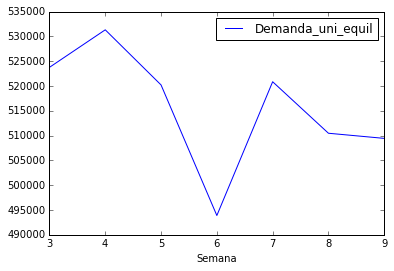

In [39]:
train.groupby('Semana')[[ 'Demanda_uni_equil']].sum().plot()

In [27]:
pd.merge(products, pd.DataFrame(train.groupby('Producto_ID')['Demanda_uni_equil'].sum().sort_values(ascending=False)), left_index=True, right_index=True)

,NombreProducto,Demanda_uni_equil
Producto_ID,,
2425,Nito 1p 62g Central BIM 2425,162885
1278,Nito 1p 62g BIM 1278,134523
1284,Rebanada 2p 55g BIM 1284,132310
43285,Gansito 1p 50g MTB MLA 43285,100980
36610,Bolsa Mini Rocko 40p 13g CU MLA 36610,87242
1240,Mantecadas Vainilla 4p 125g BIM 1240,82696
1250,Donas Azucar 4p 105g BIM 1250,82032
2233,Pan Blanco 640g BIM 2233,75287
1242,Donitas Espolvoreadas 6p 105g BIM 1242,69865


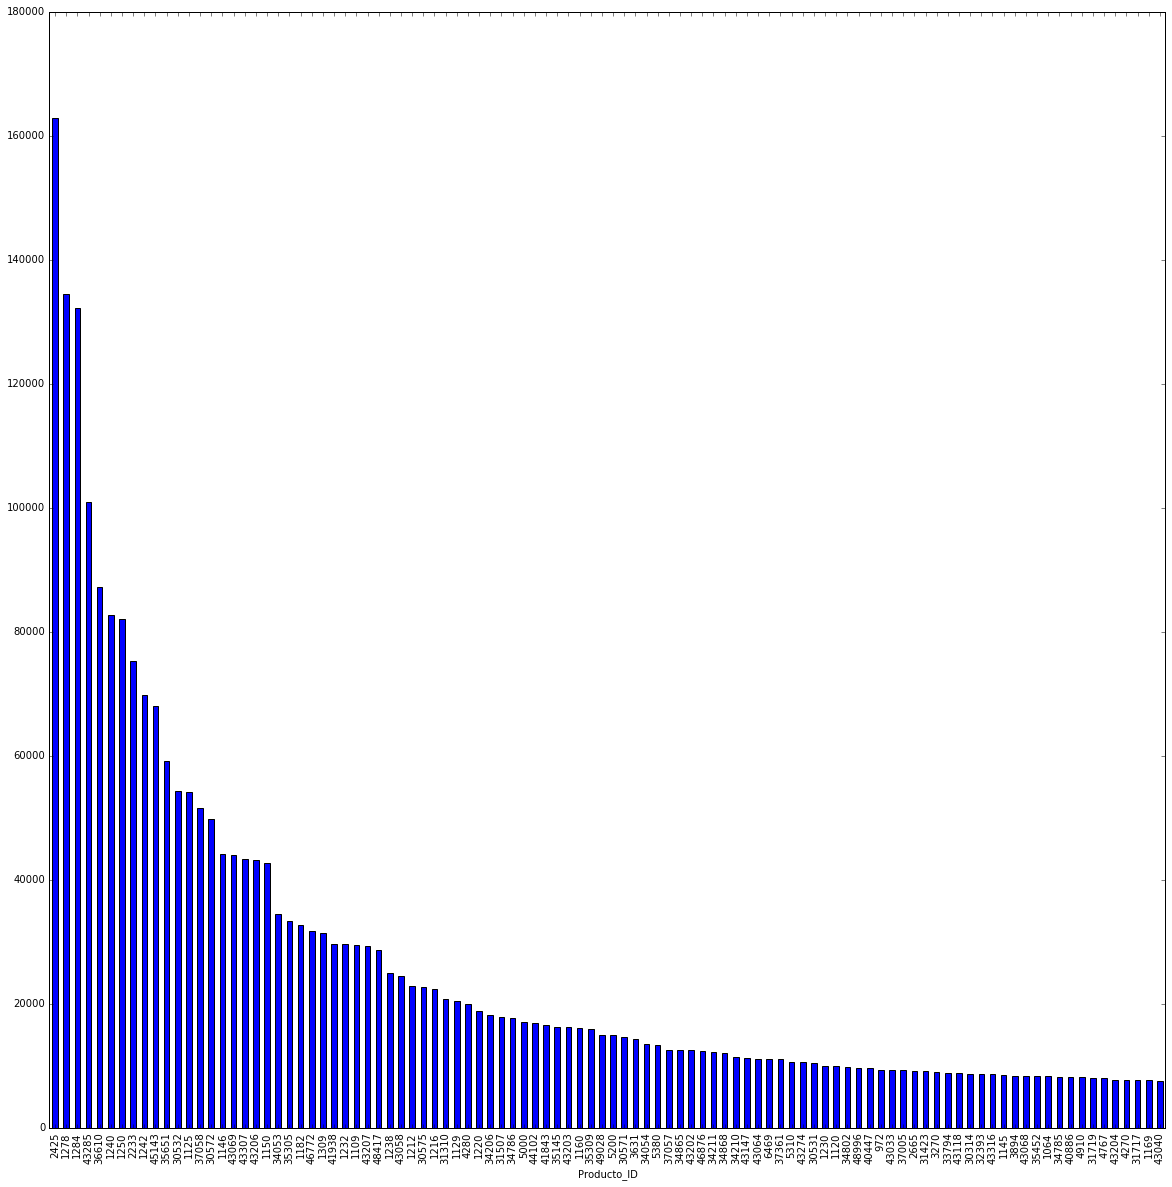

In [33]:
train.groupby('Producto_ID')['Demanda_uni_equil'].sum().sort_values(ascending=False).head(100).plot(kind='bar', figsize=(20, 20))

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
Semana               500000 non-null int64
Agencia_ID           500000 non-null int64
Canal_ID             500000 non-null int64
Ruta_SAK             500000 non-null int64
Cliente_ID           500000 non-null int64
Producto_ID          500000 non-null int64
Venta_uni_hoy        500000 non-null int64
Venta_hoy            500000 non-null float64
Dev_uni_proxima      500000 non-null int64
Dev_proxima          500000 non-null float64
Demanda_uni_equil    500000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 42.0 MB


In [47]:
df = train.groupby(['Cliente_ID', 'Producto_ID', 'Semana'])['Demanda_uni_equil'].sum().unstack().fillna(0)

In [ ]:
df.T.plot()